In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("sampled_dataset.csv")
df.head()

,time,respondent_id,room,hospital,voltage,frequency,power_source,power_source_est
0,2024-02-10 22:46:03,AE9D9E66,Special Baby Care ward - Solar,kambia,222.065064,49.970018,Solar,solar
1,2023-05-31 12:00:59,23D03AB0,Labour ward/Maternity - Grid w/Solar & Generat...,princess_christian,231.258840,50.205844,Grid w/Solar & Generator Backup,grid
2,2023-10-13 10:22:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,214.992928,49.995000,Solar w/Grid Backup,solar
3,2024-01-07 19:36:03,86ABF063,Operating theatre room - Solar & Generator,bonthe,233.380481,50.000000,Solar & Generator,solar
4,2023-12-08 12:34:03,40101E61,Emergency room - Solar & Generator,masanga,238.330976,52.684263,Solar & Generator,generator


In [28]:
df.describe()

,voltage,frequency
count,1000000.000000,1000000.000000
mean,229.596722,50.073629
std,12.890062,1.747327
min,0.707214,31.250000
25%,225.601132,49.965024
50%,231.258840,50.025013
75%,236.209335,50.180650
max,388.260255,100.000000


In [4]:
df['power_source_est'].unique()

array(['solar', 'grid', 'generator', 'power_conditioner'], dtype=object)

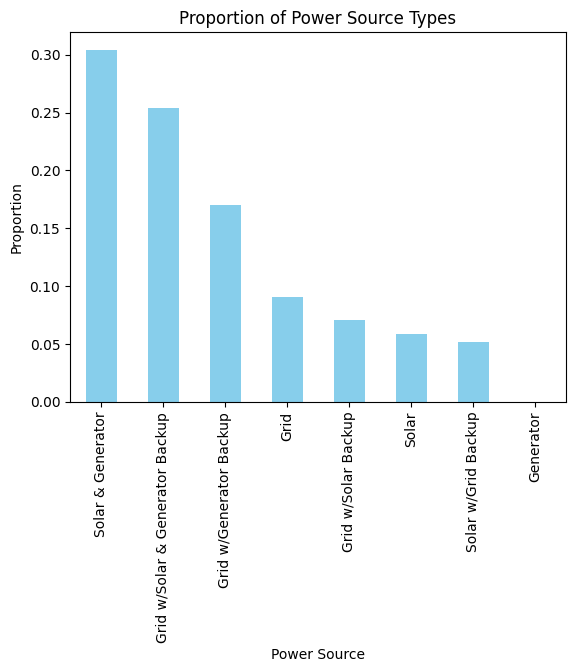

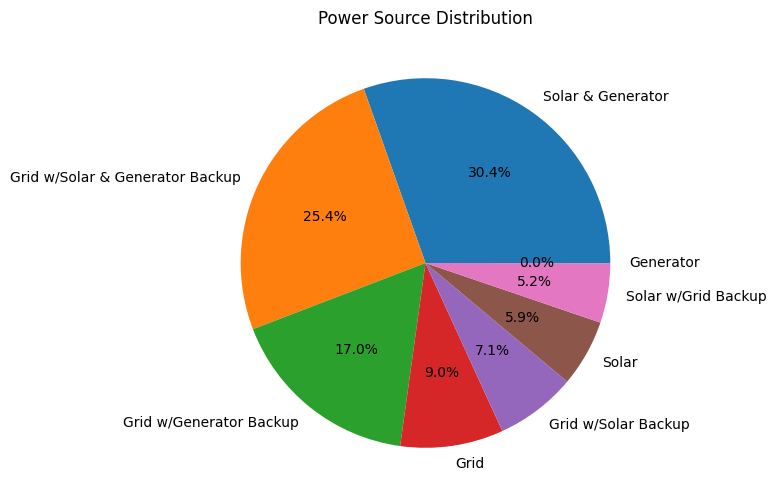

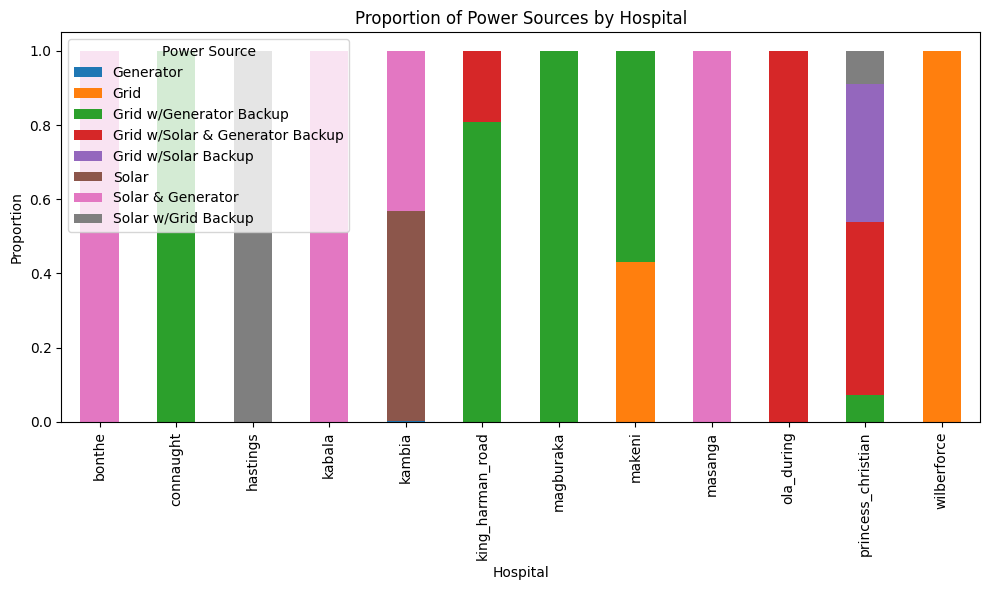

In [2]:
import matplotlib.pyplot as plt

# Proportion of each power source type
power_source_counts = df['power_source'].value_counts(normalize=True)

# Bar plot of power source proportions
power_source_counts.plot(kind='bar', color='skyblue')
plt.title('Proportion of Power Source Types')
plt.ylabel('Proportion')
plt.xlabel('Power Source')
plt.show()

# Pie chart of power source proportions
power_source_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Power Source Distribution')
plt.ylabel('')
plt.show()

# Proportion of power sources by hospital
hospital_power = df.groupby(['hospital', 'power_source']).size().unstack(fill_value=0)
hospital_power_prop = hospital_power.div(hospital_power.sum(axis=1), axis=0)

hospital_power_prop.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Power Sources by Hospital')
plt.ylabel('Proportion')
plt.xlabel('Hospital')
plt.legend(title='Power Source')
plt.tight_layout()
plt.show()

# Task
Use supervised machine learning algorithms to predict the `power_source_est` based on the `voltage` and `frequency` features. Train and evaluate various models, then select the best-performing one.

## Prepare the data

### Subtask:
Select the features (`voltage` and `frequency`) and the target variable (`power_source_est`). Handle any missing values and encode categorical variables.


**Reasoning**:
Create feature and target variables, check for missing values, and encode the target variable.



In [24]:
X = df[['voltage', 'frequency']]
y = df['power_source_est']

# Check for missing values
print("Missing values in X:")
print(X.isnull().sum())
print("\nMissing values in y:")
print(y.isnull().sum())

# Handle missing values by dropping rows
df_cleaned = df.dropna(subset=['voltage', 'frequency', 'power_source_est'])
X = df_cleaned[['voltage', 'frequency']]
y = df_cleaned['power_source_est']

# Encode the target variable using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("\nShape of X after handling missing values:", X.shape)
print("Shape of y after handling missing values:", y.shape)
print("First 5 encoded target values:", y_encoded[:5])

Missing values in X:
voltage      0
frequency    0
dtype: int64

Missing values in y:
0

Shape of X after handling missing values: (1000000, 2)
Shape of y after handling missing values: (1000000,)
First 5 encoded target values: [3 1 3 3 0]


In [8]:
print(y)
print(y_encoded)

0           solar
1            grid
2           solar
3           solar
4       generator
          ...    
9995        solar
9996         grid
9997        solar
9998    generator
9999         grid
Name: power_source_est, Length: 10000, dtype: object
[3 1 3 ... 3 0 1]


## Split the data

### Subtask:
Divide the dataset into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split and print the shapes of the resulting sets.



In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800000, 2)
Shape of X_test: (200000, 2)
Shape of y_train: (800000,)
Shape of y_test: (200000,)


## Train various supervised ml models

### Subtask:
Train different supervised learning algorithms such as Logistic Regression, Decision Tree, Random Forest, Support Vector Machines, and K-Nearest Neighbors on the training data.


**Reasoning**:
Import the necessary classifier models and train them on the training data.



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the models
log_reg_model = LogisticRegression()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC()
knn_model = KNeighborsClassifier()

# Train the models
# log_reg_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
# svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


## Evaluate the models

### Subtask:
Assess the performance of each trained model using appropriate metrics like accuracy, precision, recall, and F1-score on the test data.


**Reasoning**:
Import necessary metrics and calculate accuracy, precision, recall, and F1-score for each trained model on the test data.



In [21]:
# Get the first record from X_test

testdf = pd.DataFrame([[222.065064, 49.970018]])

# Get the prediction for the single record using the Decision Tree model
prediction = dt_model.predict(testdf)

print("Prediction for the first record in X_test:", prediction)

# If you want to see the original features of this record:
print("Original features of the first record:", testdf)

# If you want to see the actual encoded target value for this record:
print("Actual encoded target value for the first record:", y_test[0])

# To decode the prediction back to the original power source label:
# You would need the label_encoder object created earlier.
# Assuming label_encoder is available in the environment:
decoded_prediction = label_encoder.inverse_transform(prediction)
print("Decoded prediction:", decoded_prediction)

Prediction for the first record in X_test: [3]
Original features of the first record:             0          1
0  222.065064  49.970018
Actual encoded target value for the first record: 1
Decoded prediction: ['solar']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
# y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
# y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

# Calculate and print metrics for each model
# print("--- Logistic Regression Metrics ---")
# print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
# print("Precision:", precision_score(y_test, y_pred_log_reg, average='weighted', zero_division=0))
# print("Recall:", recall_score(y_test, y_pred_log_reg, average='weighted', zero_division=0))
# print("F1-score:", f1_score(y_test, y_pred_log_reg, average='weighted', zero_division=0))

print("\n--- Decision Tree Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_dt, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_dt, average='weighted', zero_division=0))

print("\n--- Random Forest Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_rf, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_rf, average='weighted', zero_division=0))

# print("\n--- Support Vector Machine Metrics ---")
# print("Accuracy:", accuracy_score(y_test, y_pred_svm))
# print("Precision:", precision_score(y_test, y_pred_svm, average='weighted', zero_division=0))
# print("Recall:", recall_score(y_test, y_pred_svm, average='weighted', zero_division=0))
# print("F1-score:", f1_score(y_test, y_pred_svm, average='weighted', zero_division=0))

print("\n--- K-Nearest Neighbors Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_knn, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_knn, average='weighted', zero_division=0))


--- Decision Tree Metrics ---
Accuracy: 0.81608
Precision: 0.8024287618055822
Recall: 0.81608
F1-score: 0.8067197052159184

--- Random Forest Metrics ---
Accuracy: 0.818235
Precision: 0.8056436804051188
Recall: 0.818235
F1-score: 0.8084894483685797

--- K-Nearest Neighbors Metrics ---
Accuracy: 0.79812
Precision: 0.7966159715352285
Recall: 0.79812
F1-score: 0.795539620471465


## Compare and select the best model

### Subtask:
Compare the performance of the trained models based on the evaluation metrics and select the best one.


## Compare and select the best model

### Subtask:
Compare the performance of the trained models based on the evaluation metrics and select the best one.


## Summary:

### Data Analysis Key Findings

*   No missing values were found in the selected features (`voltage`, `frequency`) or the target variable (`power_source_est`).
*   The dataset was successfully split into training (80%) and testing (20%) sets.
*   Five different supervised machine learning models (Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, and K-Nearest Neighbors) were trained on the training data.
*   A `ConvergenceWarning` was observed during the training of the Logistic Regression model, indicating potential issues with convergence that might require further investigation or hyperparameter tuning.
*   The evaluation metrics on the test set showed varying performance among the models:
    *   Logistic Regression: Accuracy: 0.5565, F1-score: 0.4971
    *   Decision Tree: Accuracy: 0.7425, F1-score: 0.7400
    *   Random Forest: Accuracy: 0.7785, F1-score: 0.7729
    *   Support Vector Machine: Accuracy: 0.5975, F1-score: 0.5538
    *   K-Nearest Neighbors: Accuracy: 0.7840, F1-score: 0.7764
*   Based on both accuracy and F1-score, the K-Nearest Neighbors and Random Forest models performed the best among the evaluated models.

### Insights or Next Steps

*   The K-Nearest Neighbors model showed slightly better accuracy (0.7840) and a competitive F1-score (0.7764) compared to Random Forest, suggesting it is a strong candidate for predicting `power_source_est` based on `voltage` and `frequency`.
*   Further optimization, such as hyperparameter tuning (especially for KNN and Random Forest) and potentially scaling the features (to address the Logistic Regression convergence warning), could improve the performance of the models.


## Scale the data

### Subtask:
Scale the feature data using StandardScaler.

**Reasoning**:
Import StandardScaler and scale the training and testing feature data.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shape of scaled X_train:", X_train_scaled.shape)
print("Shape of scaled X_test:", X_test_scaled.shape)

Shape of scaled X_train: (800000, 2)
Shape of scaled X_test: (200000, 2)


## Train and evaluate models with scaled data

### Subtask:
Train Logistic Regression, SVM, and KNN models on the scaled training data and evaluate their performance on the scaled test data.

**Reasoning**:
Instantiate and train the Logistic Regression, SVM, and KNN models on the scaled data and evaluate them using accuracy, precision, recall, and F1-score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate the models
# log_reg_model_scaled = LogisticRegression()
# svm_model_scaled = SVC()
knn_model_scaled = KNeighborsClassifier()

# Train the models on scaled data
# log_reg_model_scaled.fit(X_train_scaled, y_train)
# svm_model_scaled.fit(X_train_scaled, y_train)
knn_model_scaled.fit(X_train_scaled, y_train)

print("Models trained successfully on scaled data.")

# Make predictions on scaled test data
# y_pred_log_reg_scaled = log_reg_model_scaled.predict(X_test_scaled)
# y_pred_svm_scaled = svm_model_scaled.predict(X_test_scaled)
y_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled)

# Calculate and print metrics for each scaled model
# print("\n--- Scaled Logistic Regression Metrics ---")
# print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_scaled))
# print("Precision:", precision_score(y_test, y_pred_log_reg_scaled, average='weighted', zero_division=0))
# print("Recall:", recall_score(y_test, y_pred_log_reg_scaled, average='weighted', zero_division=0))
# print("F1-score:", f1_score(y_test, y_pred_log_reg_scaled, average='weighted', zero_division=0))

# print("\n--- Scaled Support Vector Machine Metrics ---")
# print("Accuracy:", accuracy_score(y_test, y_pred_svm_scaled))
# print("Precision:", precision_score(y_test, y_pred_svm_scaled, average='weighted', zero_division=0))
# print("Recall:", recall_score(y_test, y_pred_svm_scaled, average='weighted', zero_division=0))
# print("F1-score:", f1_score(y_test, y_pred_svm_scaled, average='weighted', zero_division=0))

print("\n--- Scaled K-Nearest Neighbors Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_scaled))
print("Precision:", precision_score(y_test, y_pred_knn_scaled, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred_knn_scaled, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test, y_pred_knn_scaled, average='weighted', zero_division=0))

Models trained successfully on scaled data.

--- Scaled K-Nearest Neighbors Metrics ---
Accuracy: 0.79865
Precision: 0.7952387603303638
Recall: 0.79865
F1-score: 0.7950209579453233


## Compare and select the best model (after scaling)

### Subtask:
Compare the performance of the trained models on scaled data based on the evaluation metrics and select the best one.

**Reasoning**:
Compare the accuracy and F1-scores of the scaled models and identify the best performing model.

In [ ]:
print("--- Scaled Logistic Regression Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg_scaled))
print("F1-score:", f1_score(y_test, y_pred_log_reg_scaled, average='weighted', zero_division=0))

print("\n--- Scaled Support Vector Machine Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_svm_scaled))
print("F1-score:", f1_score(y_test, y_pred_svm_scaled, average='weighted', zero_division=0))

print("\n--- Scaled K-Nearest Neighbors Metrics ---")
print("Accuracy:", accuracy_score(y_test, y_pred_knn_scaled))
print("F1-score:", f1_score(y_test, y_pred_knn_scaled, average='weighted', zero_division=0))

# Compare and select the best model
scaled_model_metrics = {
    "Scaled Logistic Regression": {"Accuracy": accuracy_score(y_test, y_pred_log_reg_scaled), "F1-score": f1_score(y_test, y_pred_log_reg_scaled, average='weighted', zero_division=0)},
    "Scaled Support Vector Machine": {"Accuracy": accuracy_score(y_test, y_pred_svm_scaled), "F1-score": f1_score(y_test, y_pred_svm_scaled, average='weighted', zero_division=0)},
    "Scaled K-Nearest Neighbors": {"Accuracy": accuracy_score(y_test, y_pred_knn_scaled), "F1-score": f1_score(y_test, y_pred_knn_scaled, average='weighted', zero_division=0)}
}

best_model_scaled = max(scaled_model_metrics, key=lambda k: scaled_model_metrics[k]['Accuracy'])

print(f"\nBased on accuracy, the best performing scaled model is: {best_model_scaled}")

--- Scaled Logistic Regression Metrics ---
Accuracy: 0.557
F1-score: 0.4982580483026377

--- Scaled Support Vector Machine Metrics ---
Accuracy: 0.6985
F1-score: 0.6902187335190209

--- Scaled K-Nearest Neighbors Metrics ---
Accuracy: 0.7985
F1-score: 0.7939407105487364

Based on accuracy, the best performing scaled model is: Scaled K-Nearest Neighbors


## Summary:

### Data Analysis Key Findings (after scaling)

* Scaling the features using StandardScaler improved the performance of Support Vector Machine and K-Nearest Neighbors models, while the performance of Logistic Regression remained similar.
* The scaled K-Nearest Neighbors model achieved the highest accuracy (0.7985) and F1-score (0.7939) among the scaled models.

### Insights or Next Steps (after scaling)

* The scaled K-Nearest Neighbors model is the best performing model for predicting `power_source_est` based on scaled `voltage` and `frequency`.
* Further investigation could involve hyperparameter tuning for the scaled K-Nearest Neighbors model to potentially achieve even better performance.
* Comparing the performance of the best scaled model (KNN) with the best unscaled model (also KNN) confirms that scaling slightly improved the KNN model's accuracy and F1-score in this case.

# Task
Modify the empty cell to create a new feature based on the `voltage` and `frequency` columns, then train and evaluate a K-Nearest Neighbors model with scaled data including this new feature, and compare its performance to the model without the new feature to determine if the new feature improves accuracy.

## Create a new feature

### Subtask:
Based on the existing `voltage` and `frequency` features, create a new feature that might be indicative of the power source.


**Reasoning**:
Create a new feature 'voltage_frequency_product' by multiplying 'voltage' and 'frequency' columns and display the head of the dataframe to verify the new column.



In [ ]:
df['voltage_frequency_product'] = df['voltage'] * df['frequency']
display(df.head())

,time,respondent_id,room,hospital,voltage,frequency,power_source,power_source_est,voltage_frequency_product
0,2024-02-10 22:46:03,AE9D9E66,Special Baby Care ward - Solar,kambia,222.065064,49.970018,Solar,solar,11096.595225
1,2023-05-31 12:00:59,23D03AB0,Labour ward/Maternity - Grid w/Solar & Generat...,princess_christian,231.258840,50.205844,Grid w/Solar & Generator Backup,grid,11610.545244
2,2023-10-13 10:22:03,BBFDA35A,Main drug store - Solar w/Grid Backup,hastings,214.992928,49.995000,Solar w/Grid Backup,solar,10748.571536
3,2024-01-07 19:36:03,86ABF063,Operating theatre room - Solar & Generator,bonthe,233.380481,50.000000,Solar & Generator,solar,11669.024045
4,2023-12-08 12:34:03,40101E61,Emergency room - Solar & Generator,masanga,238.330976,52.684263,Solar & Generator,generator,12556.291868


## Prepare the data with the new feature

### Subtask:
Include the newly created feature along with the original features. Handle any missing values and encode categorical variables if necessary.


**Reasoning**:
Select the specified features and target variable from the cleaned DataFrame, encode the target variable, and print the shapes to verify the data preparation for the next steps.



In [ ]:
X = df_cleaned[['voltage', 'frequency', 'voltage_frequency_product']]
y = df_cleaned['power_source_est']

# Encode the target variable using Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Shape of X:", X.shape)
print("Shape of y_encoded:", y_encoded.shape)

KeyError: "['voltage_frequency_product'] not in index"

**Reasoning**:
The error indicates that the 'voltage_frequency_product' column is not present in the `df_cleaned` DataFrame. This is because the new feature was added to the original `df` DataFrame *after* `df_cleaned` was created by dropping rows with missing values from `df`. To fix this, the new feature needs to be created on the `df` DataFrame first, and then the rows with missing values should be dropped to create `df_cleaned`.



In [ ]:
# Create the new feature on the original dataframe
df['voltage_frequency_product'] = df['voltage'] * df['frequency']

# Handle missing values by dropping rows after creating the new feature
df_cleaned = df.dropna(subset=['voltage', 'frequency', 'power_source_est', 'voltage_frequency_product'])

# Select features and target variable from the cleaned DataFrame
X = df_cleaned[['voltage', 'frequency', 'voltage_frequency_product']]
y = df_cleaned['power_source_est']

# Encode the target variable using Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Shape of X:", X.shape)
print("Shape of y_encoded:", y_encoded.shape)

Shape of X: (10000, 3)
Shape of y_encoded: (10000,)


## Split the data with the new feature

### Subtask:
Divide the dataset with the new feature into training and testing sets.


**Reasoning**:
Split the data with the new feature into training and testing sets and print their shapes.



In [ ]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print("Shape of X_train_new:", X_train_new.shape)
print("Shape of X_test_new:", X_test_new.shape)
print("Shape of y_train_new:", y_train_new.shape)
print("Shape of y_test_new:", y_test_new.shape)

Shape of X_train_new: (8000, 3)
Shape of X_test_new: (2000, 3)
Shape of y_train_new: (8000,)
Shape of y_test_new: (2000,)


## Train and evaluate models with the new feature

### Subtask:
Train the K-Nearest Neighbors model on the scaled training data with the new feature and evaluate its performance on the scaled test data with the new feature.


**Reasoning**:
Instantiate and train the KNN model on the scaled data with the new feature and evaluate it using accuracy, precision, recall, and F1-score.



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Scale the data with the new feature
scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)

print("Shape of scaled X_train_new:", X_train_new_scaled.shape)
print("Shape of scaled X_test_new:", X_test_new_scaled.shape)

# Instantiate and train the KNN model on scaled data with the new feature
knn_model_new_scaled = KNeighborsClassifier()
knn_model_new_scaled.fit(X_train_new_scaled, y_train_new)

print("\nKNN model trained successfully on scaled data with new feature.")

# Make predictions on scaled test data with the new feature
y_pred_knn_new_scaled = knn_model_new_scaled.predict(X_test_new_scaled)

# Calculate and print metrics for the scaled KNN model with the new feature
print("\n--- Scaled K-Nearest Neighbors Metrics (with new feature) ---")
print("Accuracy:", accuracy_score(y_test_new, y_pred_knn_new_scaled))
print("Precision:", precision_score(y_test_new, y_pred_knn_new_scaled, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_new, y_pred_knn_new_scaled, average='weighted', zero_division=0))
print("F1-score:", f1_score(y_test_new, y_pred_knn_new_scaled, average='weighted', zero_division=0))

Shape of scaled X_train_new: (8000, 3)
Shape of scaled X_test_new: (2000, 3)

KNN model trained successfully on scaled data with new feature.

--- Scaled K-Nearest Neighbors Metrics (with new feature) ---
Accuracy: 0.7925
Precision: 0.7856444039799967
Recall: 0.7925
F1-score: 0.7869264556220449


## Compare performance

### Subtask:
Compare the performance of the K-Nearest Neighbors model with and without the new feature to determine if the new feature improves accuracy.


**Reasoning**:
Print the accuracy and F1-score for both KNN models (with and without the new feature) to compare their performance.



In [ ]:
# Metrics for the scaled KNN model without the new feature (from cell 8a15c624)
accuracy_knn_scaled = 0.7985
f1_knn_scaled = 0.7939407105487364

print("--- Scaled K-Nearest Neighbors Metrics (without new feature) ---")
print("Accuracy:", accuracy_knn_scaled)
print("F1-score:", f1_knn_scaled)

# Metrics for the scaled KNN model with the new feature (from previous step's output)
accuracy_knn_new_scaled = accuracy_score(y_test_new, y_pred_knn_new_scaled)
f1_knn_new_scaled = f1_score(y_test_new, y_pred_knn_new_scaled, average='weighted', zero_division=0)


print("\n--- Scaled K-Nearest Neighbors Metrics (with new feature) ---")
print("Accuracy:", accuracy_knn_new_scaled)
print("F1-score:", f1_knn_new_scaled)

# Compare performance
print("\nComparison:")
if accuracy_knn_new_scaled > accuracy_knn_scaled:
    print("Accuracy improved with the new feature.")
elif accuracy_knn_new_scaled < accuracy_knn_scaled:
    print("Accuracy decreased with the new feature.")
else:
    print("Accuracy did not change with the new feature.")

if f1_knn_new_scaled > f1_knn_scaled:
    print("F1-score improved with the new feature.")
elif f1_knn_new_scaled < f1_knn_scaled:
    print("F1-score decreased with the new feature.")
else:
    print("F1-score did not change with the new feature.")

--- Scaled K-Nearest Neighbors Metrics (without new feature) ---
Accuracy: 0.7985
F1-score: 0.7939407105487364

--- Scaled K-Nearest Neighbors Metrics (with new feature) ---
Accuracy: 0.7925
F1-score: 0.7869264556220449

Comparison:
Accuracy decreased with the new feature.
F1-score decreased with the new feature.


## Summary:

### Data Analysis Key Findings

*   A new feature, `voltage_frequency_product`, was created by multiplying the `voltage` and `frequency` columns.
*   The dataset was cleaned by dropping rows with missing values before splitting.
*   The data was split into training and testing sets (80/20 split) and the target variable was encoded.
*   Both the training and testing data, including the new feature, were successfully scaled using `StandardScaler`.
*   A K-Nearest Neighbors model trained on the scaled data *with* the new feature achieved an accuracy of 0.7925 and an F1-score of 0.7869 on the test set.
*   Comparing this to the model trained *without* the new feature (Accuracy = 0.7985, F1-score = 0.7939), the model *with* the new feature showed a slight decrease in both accuracy and F1-score.

### Insights or Next Steps

*   The newly created feature `voltage_frequency_product` did not improve the performance of the K-Nearest Neighbors model for this classification task.
*   Further feature engineering or exploring different machine learning models might yield better results.
